In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import pandas as pd

path = '~/codedata/tpai/pre/'
trainfile = 'test.csv'
test = pd.read_csv(path + trainfile)
trainfile = 'train.csv'
train = pd.read_csv(path + trainfile)
ad = pd.read_csv(path + 'ad.csv')

test.drop('instanceID', axis=1, inplace=True)
train = pd.concat([train, test])

appcategory = pd.read_csv(path + 'app_categories.csv')
# appId在creativeID的标号内
train = pd.merge(train, ad, on='creativeID',how='left')
train = pd.merge(train,appcategory,on='appID',how='left')
train['plateform_category'] = train['appPlatform'] * 1000 + train['appCategory']
del ad
del appcategory
train.head()

clickTime  connectionType  conversionTime  creativeID  label  positionID  \
0     170000               1             NaN        3089      0         293   
1     170000               1             NaN        1259      0        6161   
2     170000               4             NaN        4465      0        7434   
3     170000               1             NaN        1004      0         977   
4     170000               1             NaN        1887      0        3688   

   telecomsOperator   userID  adID  camgaignID  advertiserID  appID  \
0                 1  2798058  1321          83            10    434   
1                 2   463234  1535         685            80     14   
2                 1  1857485   147         460             3    465   
3                 1  2038823   411         564             3    465   
4                 1  2015141   369         144            84    360   

   appPlatform  appCategory  plateform_category  
0            1          108                1108  
1            2            2                2002  
2            1          209                1209  
3            1          209                1209  
4            1          201                1201

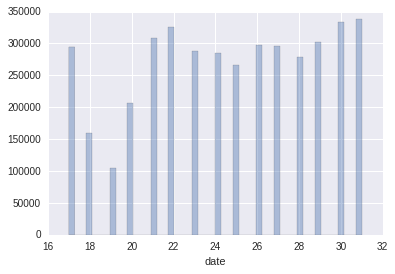

In [2]:
# 测试集只有一天
var = 'date'
train[var] = (train['clickTime'].values) / 10000
# test[var] = property(var, train)
sns.distplot(train[var], kde=False)

In [3]:
test = {}
def property(var, train):
    # 点击量的统计直方图     
    sns.distplot(train[var], kde=False)
    # means = train.groupby(var)['date'].mean()
    group = train.groupby('date')[var]
    means = group.mean()
    std = group.std()
    # 根据var属性的每一个取值做均值     
    fig = plt.figure()
    plt.scatter(x=means.index, y = means.values)
    fig = plt.figure()
    plt.scatter(x=std.index, y = std.values)
    # 按顺序画散点图
    sort_means = means.sort_values(ascending = False)
    fig = plt.figure()
    plt.scatter(x = range(0,len(sort_means)), y = sort_means.values)
    # 方差存储的是不同天的var属性的方差，std.std()     
    return (var, len(train[var].value_counts()),std.max()-std.min(), std.std(), sort_means.max() - sort_means.min(), sort_means.std())

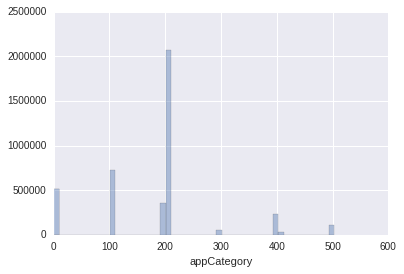

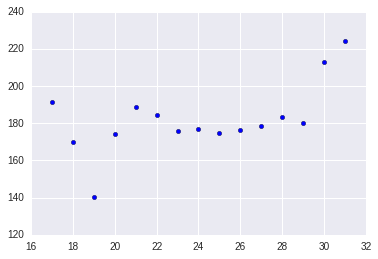

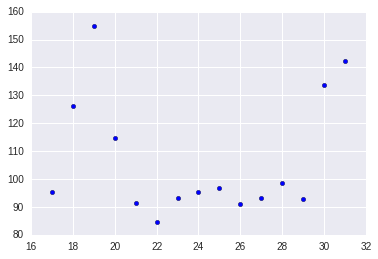

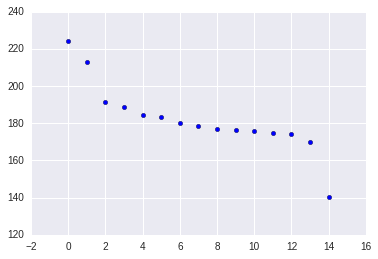

In [4]:
# appID其实只有app类别属性，应该可以被替代
var = 'appCategory'
# sns.distplot(train[var],kde=False)
# fig = plt.figure()
# means = train.groupby(var)['label'].mean()
# plt.xlim(0,600)
# plt.scatter(x=means.index, y=means.values)
# print type(means)
# means.sort_values(ascending=False)
# sns.jointplot(x=means.index,y=means.values, xlim=(0,600), dropna=False)
# data = pd.concat([appcategory['appID'], appcategory['appCategory']], axis = 1)
# data.plot.scatter(x='appID', y='appCategory')
# 存在安卓、苹果、未知
test[var] = property(var, train)

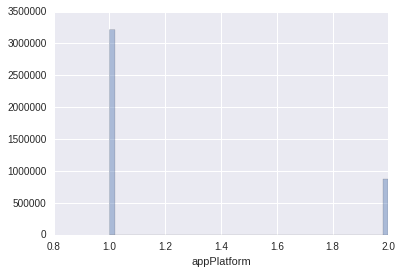

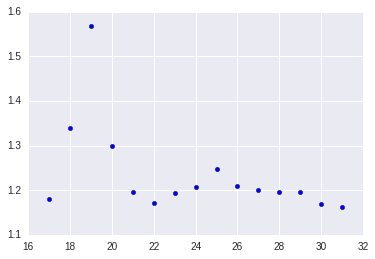

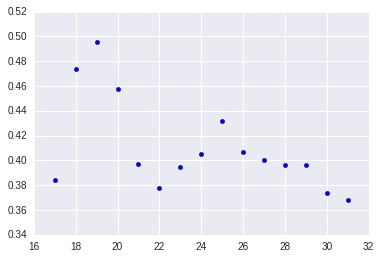

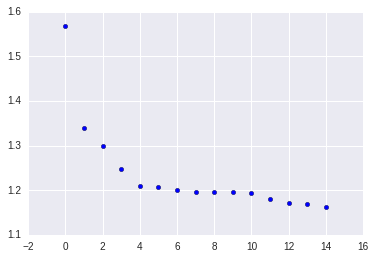

In [5]:
# appID其实只有app类别属性，应该可以被替代
var = 'appPlatform'
test[var] = property(var, train)
# sns.distplot(train[var],kde=False)
# fig = plt.figure()
# means = train.groupby(var)['label'].mean()
# plt.xlim(0,600)
# plt.scatter(x=means.index, y=means.values)
# print type(means)
# means.sort_values(ascending=False)
# sns.jointplot(x=means.index,y=means.values, xlim=(0,600), dropna=False)
# data = pd.concat([appcategory['appID'], appcategory['appCategory']], axis = 1)
# data.plot.scatter(x='appID', y='appCategory')

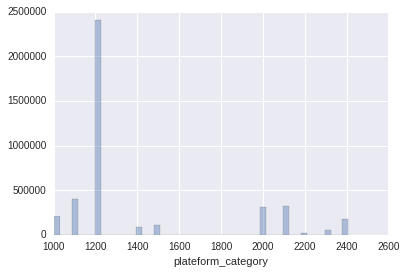

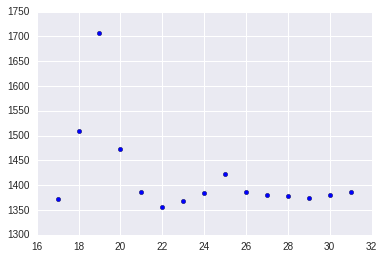

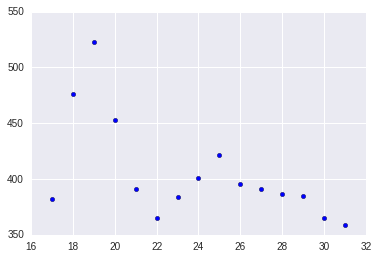

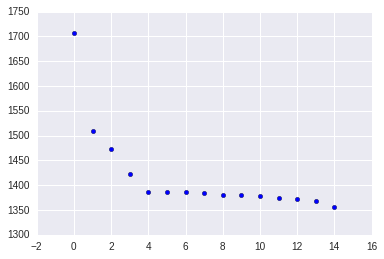

In [6]:
var = 'plateform_category'
test[var] = property(var, train)

In [7]:
for (k,v) in test.items():
    print v

('plateform_category', 18, 163.36148009369577, 45.4469441513181, 350.72567903360095, 90.233559607801013)
('appCategory', 14, 70.023231932637415, 21.817140352303756, 84.043014123467515, 18.862855432063565)
('appPlatform', 2, 0.12734175174527373, 0.037574032205801092, 0.40490198374594844, 0.10387374446990164)
